In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
import pandas as pd

In [4]:
header = pd.read_csv("/content/drive/MyDrive/key.csv",sep='\t',header=None).transpose()[0].tolist()

In [5]:
test = pd.read_csv("/content/drive/MyDrive/test-balanced.csv",sep='\t',names = header)
train = pd.read_csv("/content/drive/MyDrive/train-balanced.csv",sep='\t',names = header)

In [6]:
train.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,1476662123,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,1477959850,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,1474580737,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,1476824627,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,1483117213,Yep can confirm I saw the tool they use for th...


In [7]:
len(train)

1010826

In [8]:
train.subreddit.value_counts()

AskReddit               65677
politics                39496
worldnews               26377
leagueoflegends         21037
pcmasterrace            18988
                        ...  
MirageAW                    1
Kerbal_Space_Program        1
Minah                       1
lolcast                     1
OSXBeta                     1
Name: subreddit, Length: 14878, dtype: int64

In [9]:
train.isnull().sum()

label              0
comment           53
author             0
subreddit          0
score              0
ups                0
downs              0
date               0
created_utc        0
parent_comment     0
dtype: int64

In [10]:
test.isnull().sum()

label              0
comment           14
author             0
subreddit          0
score              0
ups                0
downs              0
date               0
created_utc        0
parent_comment     0
dtype: int64

In [11]:
train.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)

In [12]:
test.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)

In [13]:
train.isnull().sum()

label             0
comment           0
author            0
subreddit         0
score             0
ups               0
downs             0
date              0
created_utc       0
parent_comment    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


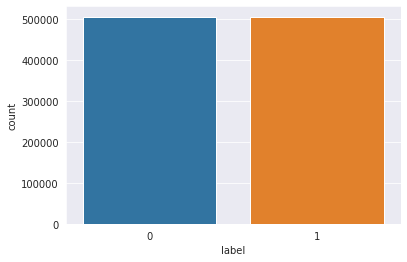

In [14]:
sns.set_style("darkgrid")
sns.countplot(train.label)

In [15]:
train['comment'] = train.comment.map(lambda x: x.lower())

In [16]:
train.head(10)

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,nc and nh.,Trumpbart,politics,2,-1,-1,2016-10,1476662123,"Yeah, I get that argument. At this point, I'd ..."
1,0,you do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,1477959850,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"they were underdogs earlier today, but since g...",Creepeth,nfl,3,3,0,2016-09,1474580737,They're favored to win.
3,0,"this meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,1476824627,deadass don't kill my buzz
4,0,i could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,1483117213,Yep can confirm I saw the tool they use for th...
5,0,"i don't pay attention to her, but as long as s...",only7inches,AskReddit,0,0,0,2016-09,1472812508,do you find ariana grande sexy ?
6,0,trick or treating in general is just weird...,only7inches,AskReddit,1,-1,-1,2016-10,1477258983,What's your weird or unsettling Trick or Treat...
7,0,blade mastery+masamune or gtfo!,P0k3rm4s7,FFBraveExvius,2,-1,-1,2016-10,1476393235,Probably Sephiroth. I refuse to taint his grea...
8,0,"you don't have to, you have a good build, buy ...",SoupToPots,pcmasterrace,1,-1,-1,2016-10,1477595466,What to upgrade? I have $500 to spend (mainly ...
9,0,i would love to see him at lolla.,chihawks,Lollapalooza,2,-1,-1,2016-11,1479771552,Probably count Kanye out Since the rest of his...


In [17]:
train['comment'] = train.comment.str.replace('[^\w\s]', '')

In [18]:
train.head(10)

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,nc and nh,Trumpbart,politics,2,-1,-1,2016-10,1476662123,"Yeah, I get that argument. At this point, I'd ..."
1,0,you do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,1477959850,The blazers and Mavericks (The wests 5 and 6 s...
2,0,they were underdogs earlier today but since gr...,Creepeth,nfl,3,3,0,2016-09,1474580737,They're favored to win.
3,0,this meme isnt funny none of the new york nigg...,icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,1476824627,deadass don't kill my buzz
4,0,i could use one of those tools,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,1483117213,Yep can confirm I saw the tool they use for th...
5,0,i dont pay attention to her but as long as she...,only7inches,AskReddit,0,0,0,2016-09,1472812508,do you find ariana grande sexy ?
6,0,trick or treating in general is just weird,only7inches,AskReddit,1,-1,-1,2016-10,1477258983,What's your weird or unsettling Trick or Treat...
7,0,blade masterymasamune or gtfo,P0k3rm4s7,FFBraveExvius,2,-1,-1,2016-10,1476393235,Probably Sephiroth. I refuse to taint his grea...
8,0,you dont have to you have a good build buy gam...,SoupToPots,pcmasterrace,1,-1,-1,2016-10,1477595466,What to upgrade? I have $500 to spend (mainly ...
9,0,i would love to see him at lolla,chihawks,Lollapalooza,2,-1,-1,2016-11,1479771552,Probably count Kanye out Since the rest of his...


In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
train['comment'] = train['comment'].apply(nltk.word_tokenize)

In [22]:
train.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,"[nc, and, nh]",Trumpbart,politics,2,-1,-1,2016-10,1476662123,"Yeah, I get that argument. At this point, I'd ..."
1,0,"[you, do, know, west, teams, play, against, we...",Shbshb906,nba,-4,-1,-1,2016-11,1477959850,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"[they, were, underdogs, earlier, today, but, s...",Creepeth,nfl,3,3,0,2016-09,1474580737,They're favored to win.
3,0,"[this, meme, isnt, funny, none, of, the, new, ...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,1476824627,deadass don't kill my buzz
4,0,"[i, could, use, one, of, those, tools]",cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,1483117213,Yep can confirm I saw the tool they use for th...


In [23]:
from nltk.stem import PorterStemmer

In [24]:
stemmer = PorterStemmer()

In [25]:
train['comment'] = train['comment'].apply(lambda x: [stemmer.stem(y) for y in x])

In [26]:
train.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,"[nc, and, nh]",Trumpbart,politics,2,-1,-1,2016-10,1476662123,"Yeah, I get that argument. At this point, I'd ..."
1,0,"[you, do, know, west, team, play, against, wes...",Shbshb906,nba,-4,-1,-1,2016-11,1477959850,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"[they, were, underdog, earlier, today, but, si...",Creepeth,nfl,3,3,0,2016-09,1474580737,They're favored to win.
3,0,"[thi, meme, isnt, funni, none, of, the, new, y...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,1476824627,deadass don't kill my buzz
4,0,"[i, could, use, one, of, those, tool]",cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,1483117213,Yep can confirm I saw the tool they use for th...


In [27]:
train['comment'] = train['comment'].apply(lambda x: ' '.join(x))

In [28]:
from sklearn.model_selection import train_test_split

train ,test = train_test_split(train,test_size=0.2) 
np.random.seed(0)
train

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
129435,0,weld,donfan,houston,1,-1,-1,2016-11,1478374804,What would be the best certificate or associat...
476930,1,lawrenc drop out,snapperhead6,politics,6,6,0,2015-11,1447272994,"Money in politics permeates every issue, and y..."
656182,0,the drone had a gp modul and log of posit also...,PlasmaPower,news,20,20,0,2015-06,1435601087,It seems like it would spawn a lot of question...
629020,1,clinton will save us im sure,cynical_man,technology,1,1,0,2015-12,1450906183,Internet Freedom Is Actively Dissolving in Ame...
610340,0,it toasti enough in new jersey right now pl,Liquidies,videos,6,6,0,2015-12,1450925979,"Well, in New Jersey this would qualify him to ..."
...,...,...,...,...,...,...,...,...,...,...
910764,0,did you feel safe and protect,SydneyTom,AdviceAnimals,1,1,0,2013-10,1382739890,Tonight was a good night
60416,0,fuck off cori,littlenick27,australia,53,-1,-1,2016-11,1478494433,Needs to be shortened a bit. Three words might...
70221,1,omg u haxxxer,LehGogh,Diepio,0,-1,-1,2016-11,1479213115,"Remember when the developer said about the ""De..."
30130,0,they do care about the new emoji though,asendra,Android,11,-1,-1,2016-12,1481618389,Most iPhone users don't really care about upda...


In [29]:
X_train = train['comment'].values
X_test = test['comment'].values
y_train = train['label'].values
y_test = test['label'].values

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import svm

In [31]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', svm.LinearSVC())
])
text_clf = text_clf.fit(X_train,y_train)

In [32]:
y_test_predicted = text_clf.predict(X_test)
np.mean(y_test_predicted == y_test)

0.682224036011971

In [33]:
print("Accuracy of the model is:",np.mean(y_test_predicted == y_test),"%")

Accuracy of the model is: 0.682224036011971 %


In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
cf_matrix = confusion_matrix(y_test, y_test_predicted)
print(cf_matrix)

[[71512 29541]
 [34699 66403]]


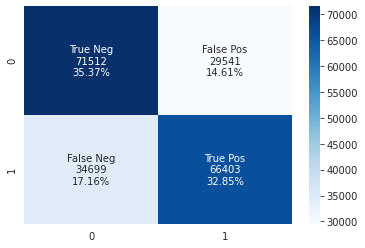

In [36]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')